# Visualization of the results:

This notebook is provided to regenerate the plots in the manuscript. The assumption is that all the predictions required, made by different models, are already provided in xlsx format in a folder called "results."

Here we import all the required modules:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math  
from sklearn.metrics import r2_score as r2s
from sklearn.metrics import mean_squared_error as mse 

# Preprocessing

The "xlsx" files provided include only the predictions made by the models. Here we upload the file (merged_csv) containing all the ground-truths as well to be later combined with the dataframe corresponding to each model's results:

In [2]:
data = pd.read_csv('merged_csv.csv')

categories = {
    '1_Ni_Cu': 'binary',
    '2_Ni_Au': 'binary',
    '3_Cu_Au': 'binary',
    '4_Ni_Pd': 'binary',
    '5_Cu_Pd': 'binary',
    '6_Au_Pd': 'binary',
    '7_Ni_Pt': 'binary',
    '8_Cu_Pt': 'binary',
    '9_Au_Pt': 'binary',
    '10_Pd_Pt': 'binary',
    '1_Ni_Cu_Au': 'ternary',
    '2_Ni_Cu_Pd': 'ternary',
    '3_Ni_Au_Pd': 'ternary',
    '4_Cu_Au_Pd': 'ternary',
    '1_Ni_Cu_Au_Pd': 'quaternary',
    '1_Ni_Cu_Au_Pd_Pt': 'quinary',
    }


structures = list(categories.keys())

j = 0
dirs = []
types = []

for i in range(len(data['Structure'])-1):
    dirs.append(structures[j])
    types.append(categories[structures[j]])
    if data['Structure'].iloc[i] > data['Structure'].iloc[i+1]:
        j += 1

dirs.append(structures[j])
types.append(categories[structures[j]])

train_len, test_len = int(0.7*len(data)), int(0.15*len(data))
val_len = len(data) - train_len - test_len
train_split = ['train' for i in range(train_len)]
test_split = ['test' for i in range(test_len)]
val_split = ['validation' for i in range(val_len)]
splits = np.concatenate([train_split, test_split, val_split])
np.random.shuffle(splits)

data['directory'] = dirs
data['type'] = types
data['split'] = splits
data['c11_pred'] = data['c11']
data['c12_pred'] = data['c12']
data['c44_pred'] = data['c44']
data['G_pred'] = data['G']
data['B_pred'] = data['B']
data['E_VRH_pred'] = data['E_VRH']
data['nu_pred'] = data['nu']
data['Cohesive_energy_pred'] = data['Cohesive_energy']

new_order = ['Structure', 'directory', 'type', 'split', 'c11', 'c11_pred',
             'c12', 'c12_pred', 'c44', 'c44_pred', 'G', 'G_pred',
             'B', 'B_pred', 'E_VRH', 'E_VRH_pred', 'nu', 'nu_pred',
             'Cohesive_energy', 'Cohesive_energy_pred']
data = data[new_order]

data.to_csv('data.csv', index=False)

Now the corresponding columns (predictions) in this newly generated dataframe can be updated based on each model's results. Different plotting functions would then receive these updated dataframes as the inputs to generate the desired figures. 

# Plotting the histogram


In [3]:
from visualize import hist_plot

The following code is used to generate figure 3 in the manuscripts:

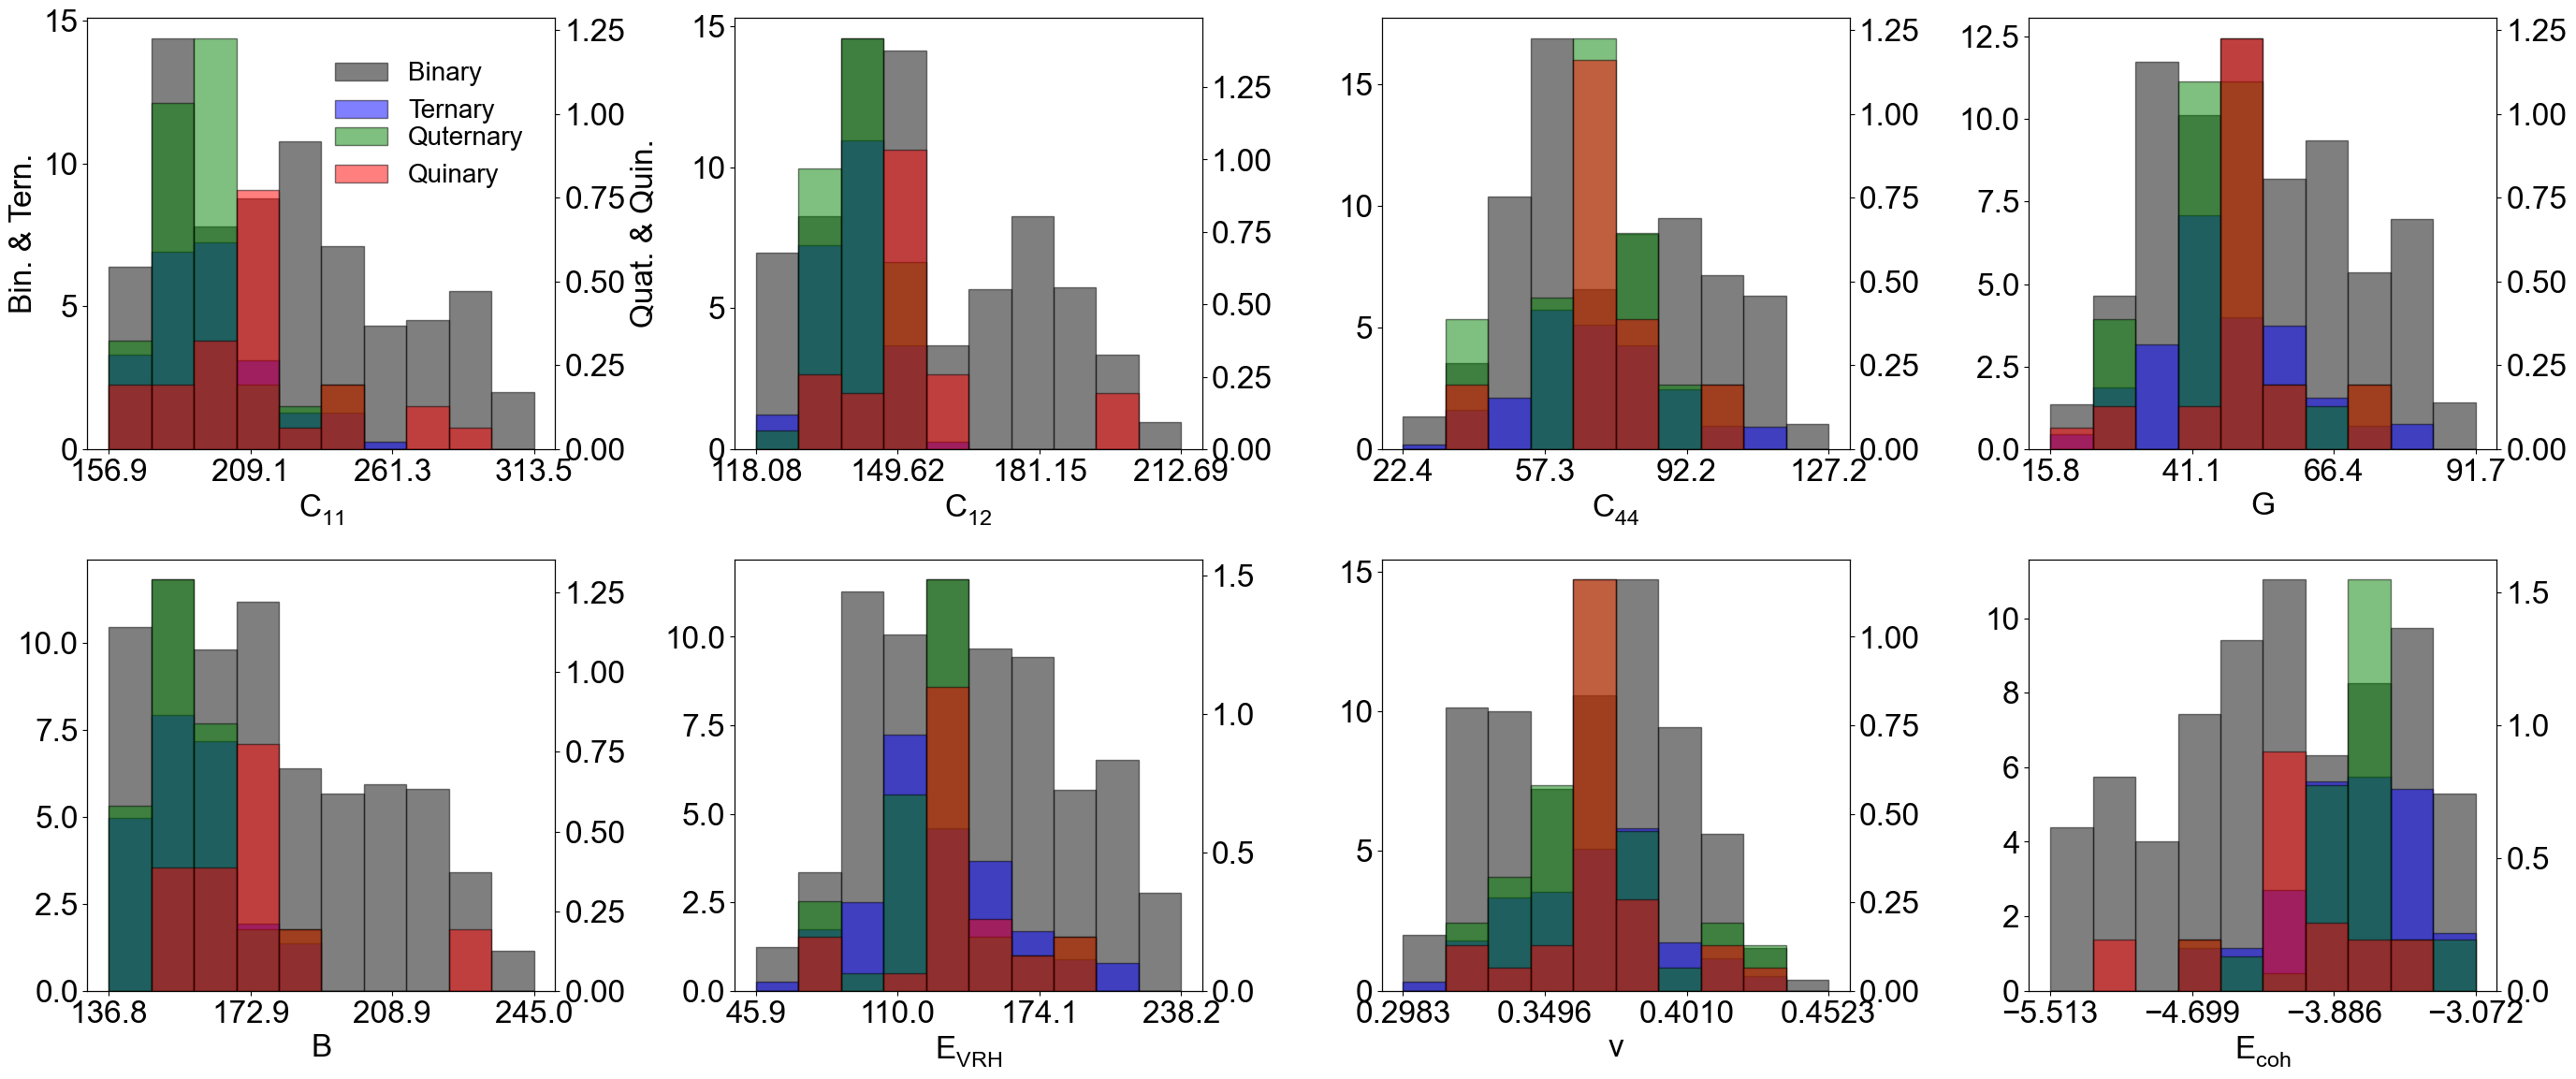

In [4]:
data = pd.read_csv('data.csv')
hist_plot(data, labeled_by='type')

# Plotting the results of the multitarget regression (normalized data)
The following code is used to generate figure 4 in the manuscripts

In [5]:
from visualize import plot_r2

100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


<Figure size 2400x1200 with 0 Axes>

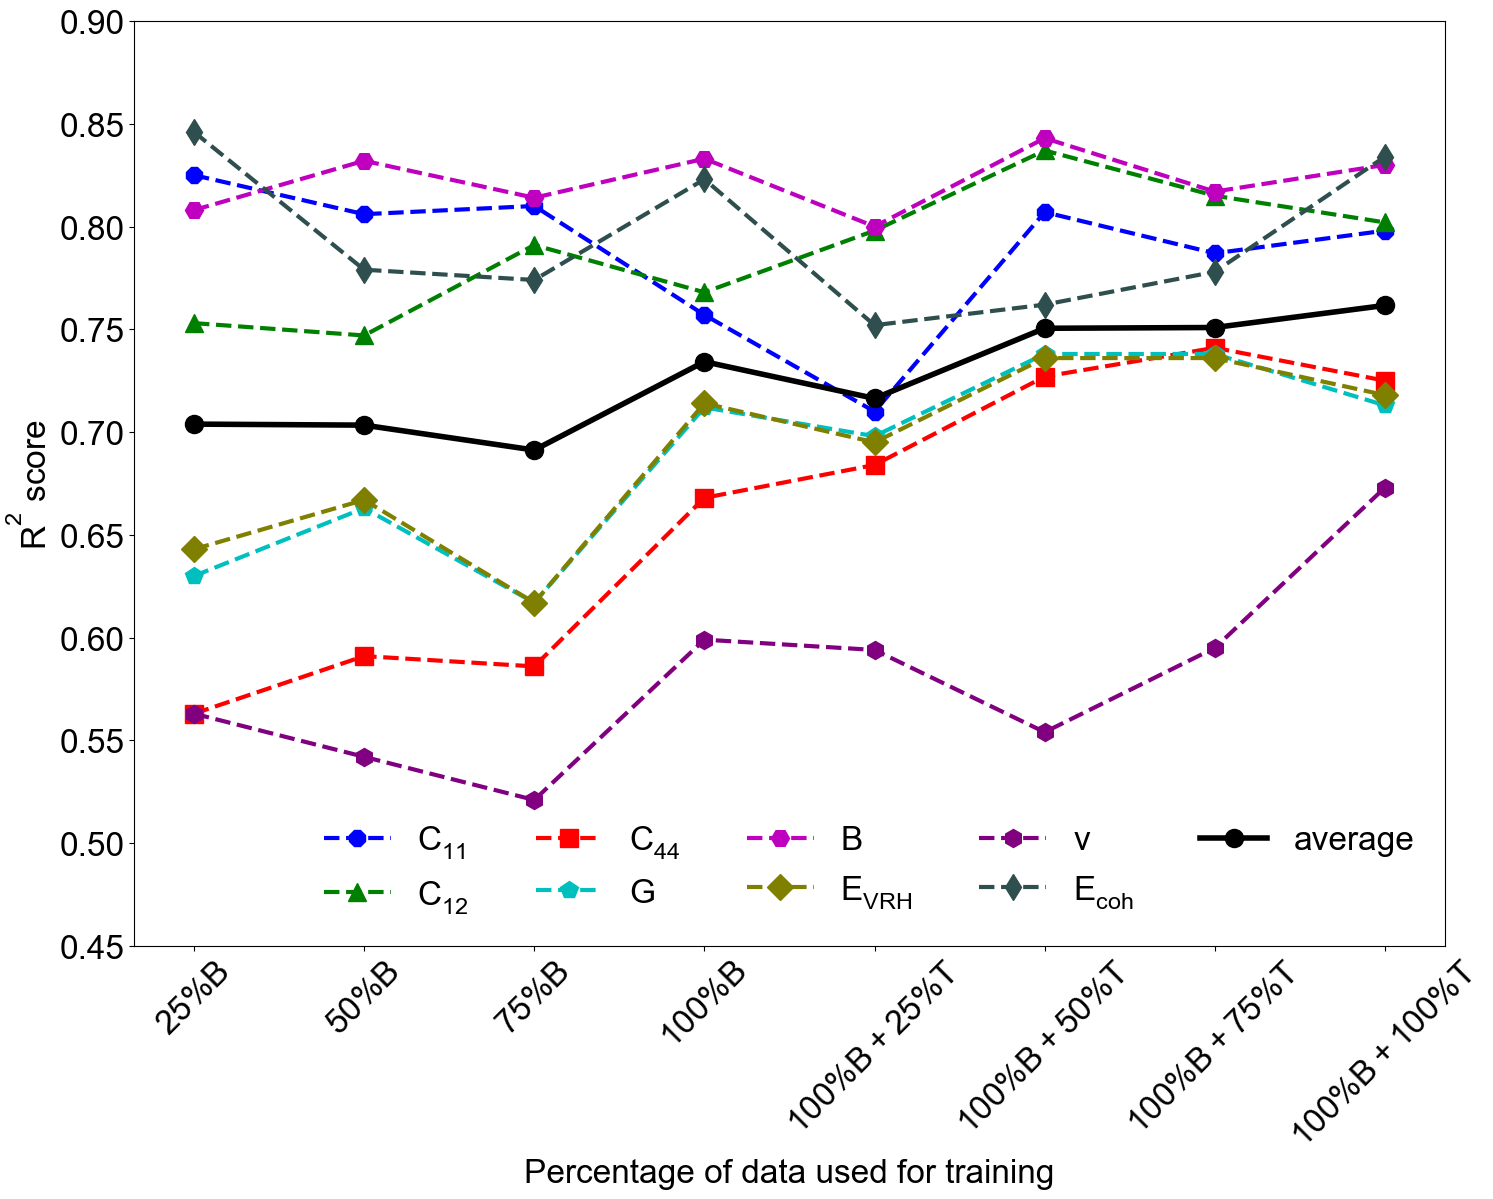

In [6]:
data = pd.read_csv('data.csv')
r2_values = plot_r2(data)

Note that by calling the function plot_r2, the augmented results for each model is also generated and saved in the directory: "results/normalized"

# Plotting the results of the single target regression (unnormalized data)

For the rest of the figures, we need to collect the results of 8 different models saved in xlsx format to have the whole the whole predictions and ground-truths in an augmented CSV file. We start with the results obtained by the models trained on 100 binaries:

In [7]:
root = 'results/100%Binaries(No normalization)'
pred_columns = ['c11', 'c12', 'c44', 'G', 'B', 'E_VRH', 'nu', 'Cohesive_energy']
filenames = [f'{root}/results_100B_{col}.xlsx' for col in pred_columns]

data = pd.read_csv('data.csv')

B_100 = pd.read_excel('results/normalized/results_100B.xlsx')
data['split'] = B_100['set_type']
data['split'] = data['split'].replace('training', 'train')

for i in range(len(pred_columns)):
    result = pd.read_excel(filenames[i], header=None, names=[pred_columns[i]])
    data[f'{pred_columns[i]}_pred'] = result

data.to_csv(f'{root}/augmented_results_100B.csv', index=False)

Note that the augmented results are now saved in the directory: "results/100%Binaries(No normalization)"

In [8]:
from visualize import target_vs_preds

The following code is used to generate figure 5 in the manuscripts:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

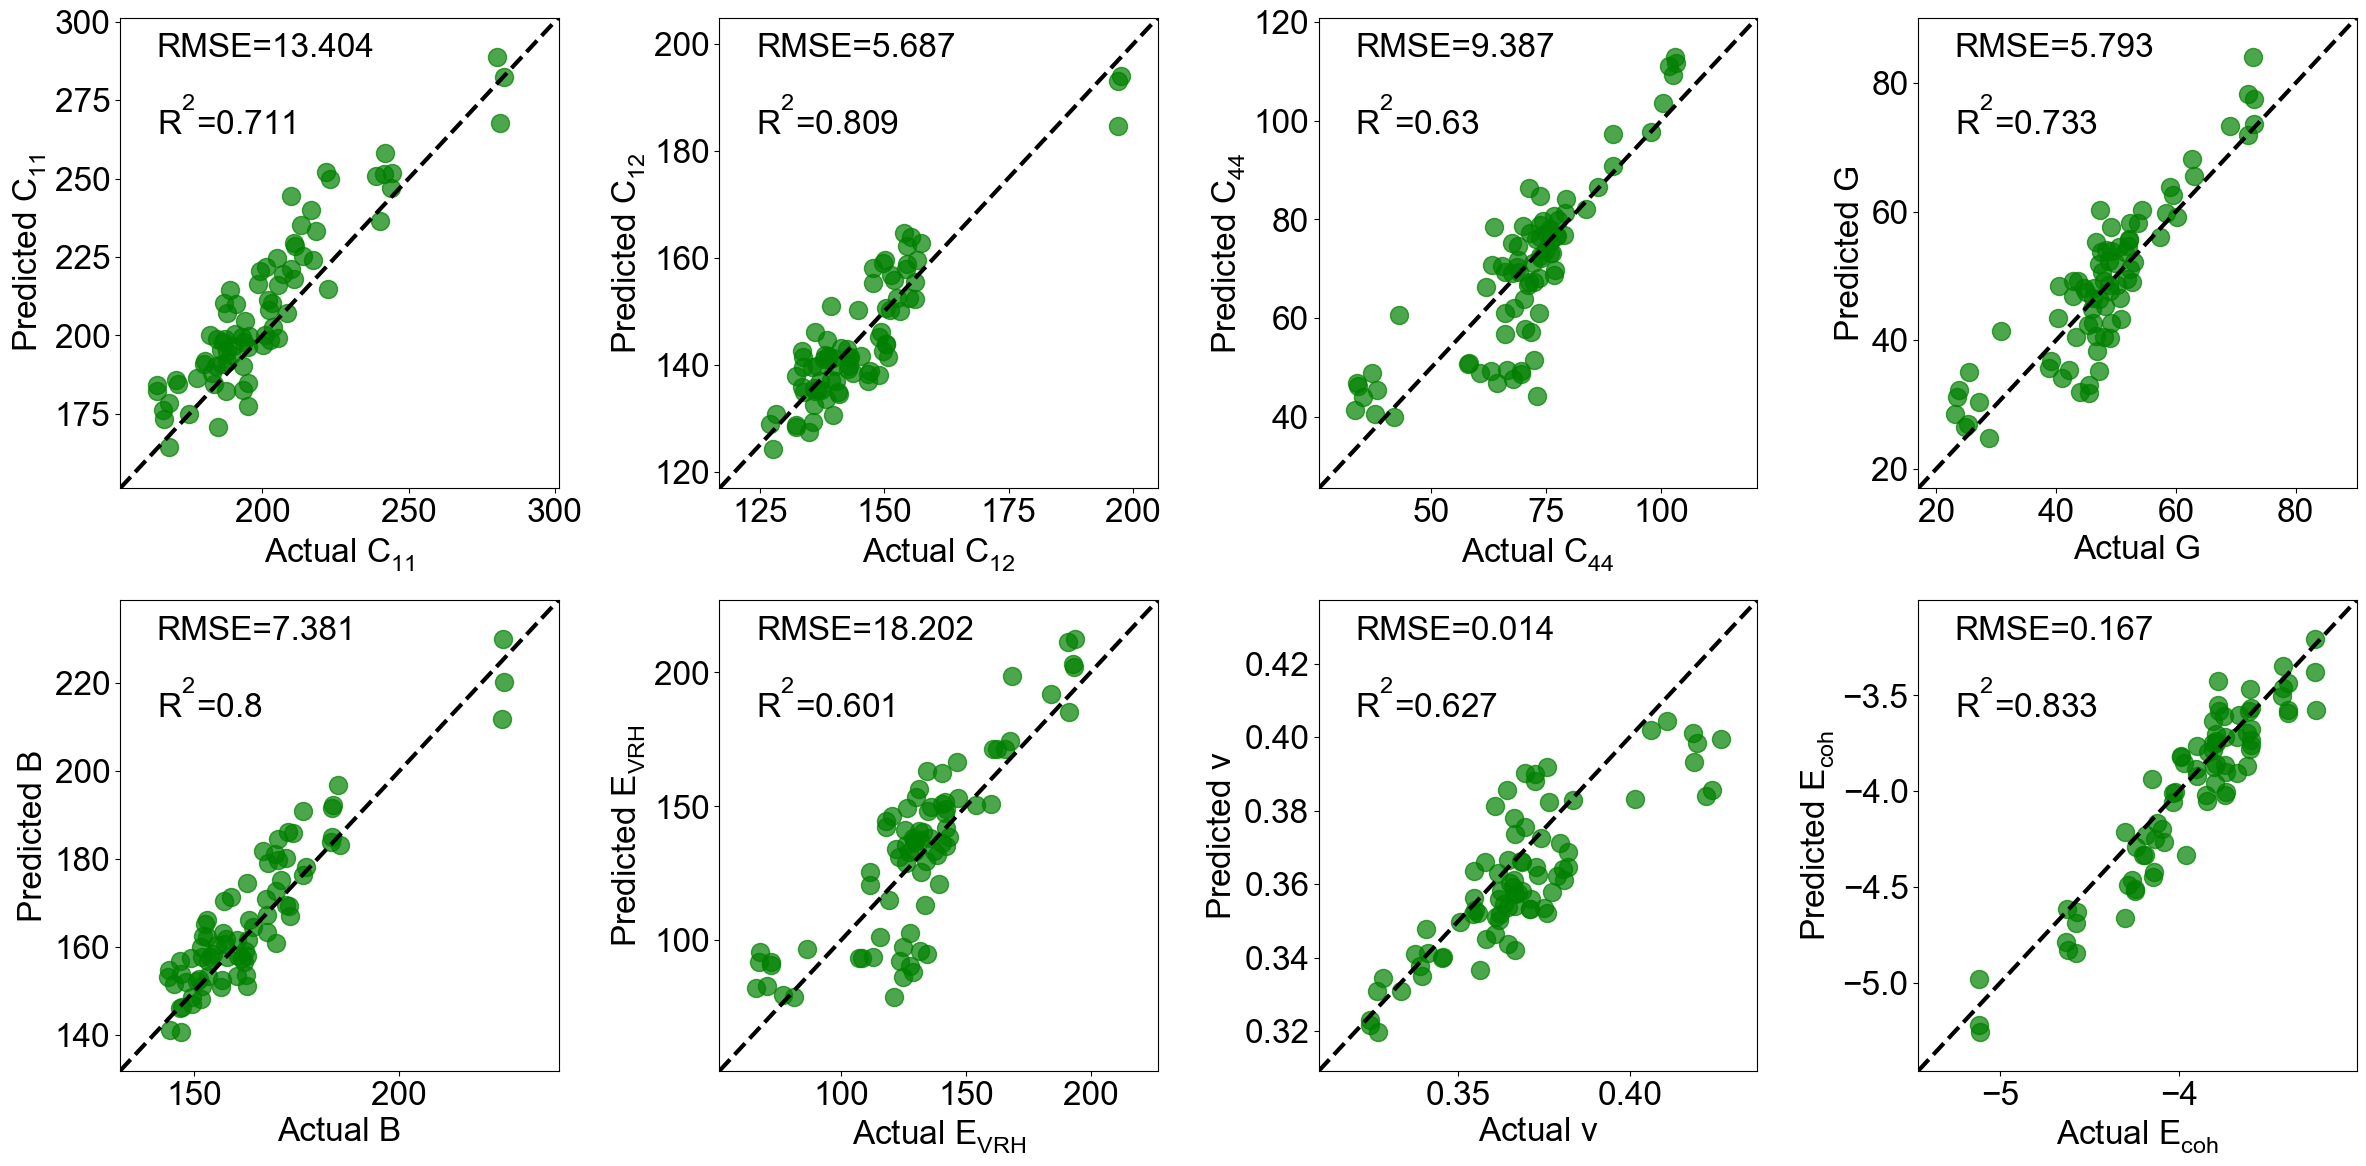

In [9]:
data = pd.read_csv('results/100%Binaries(No normalization)/augmented_results_100B.csv')
data = data[data['type'].isin(['quaternary', 'quinary'])]
target_vs_preds(data, color_code_by=None, path_to_save='plots/qq_100B_unnormalized.png')

The following code is used to generate figure 6 in the manuscripts:


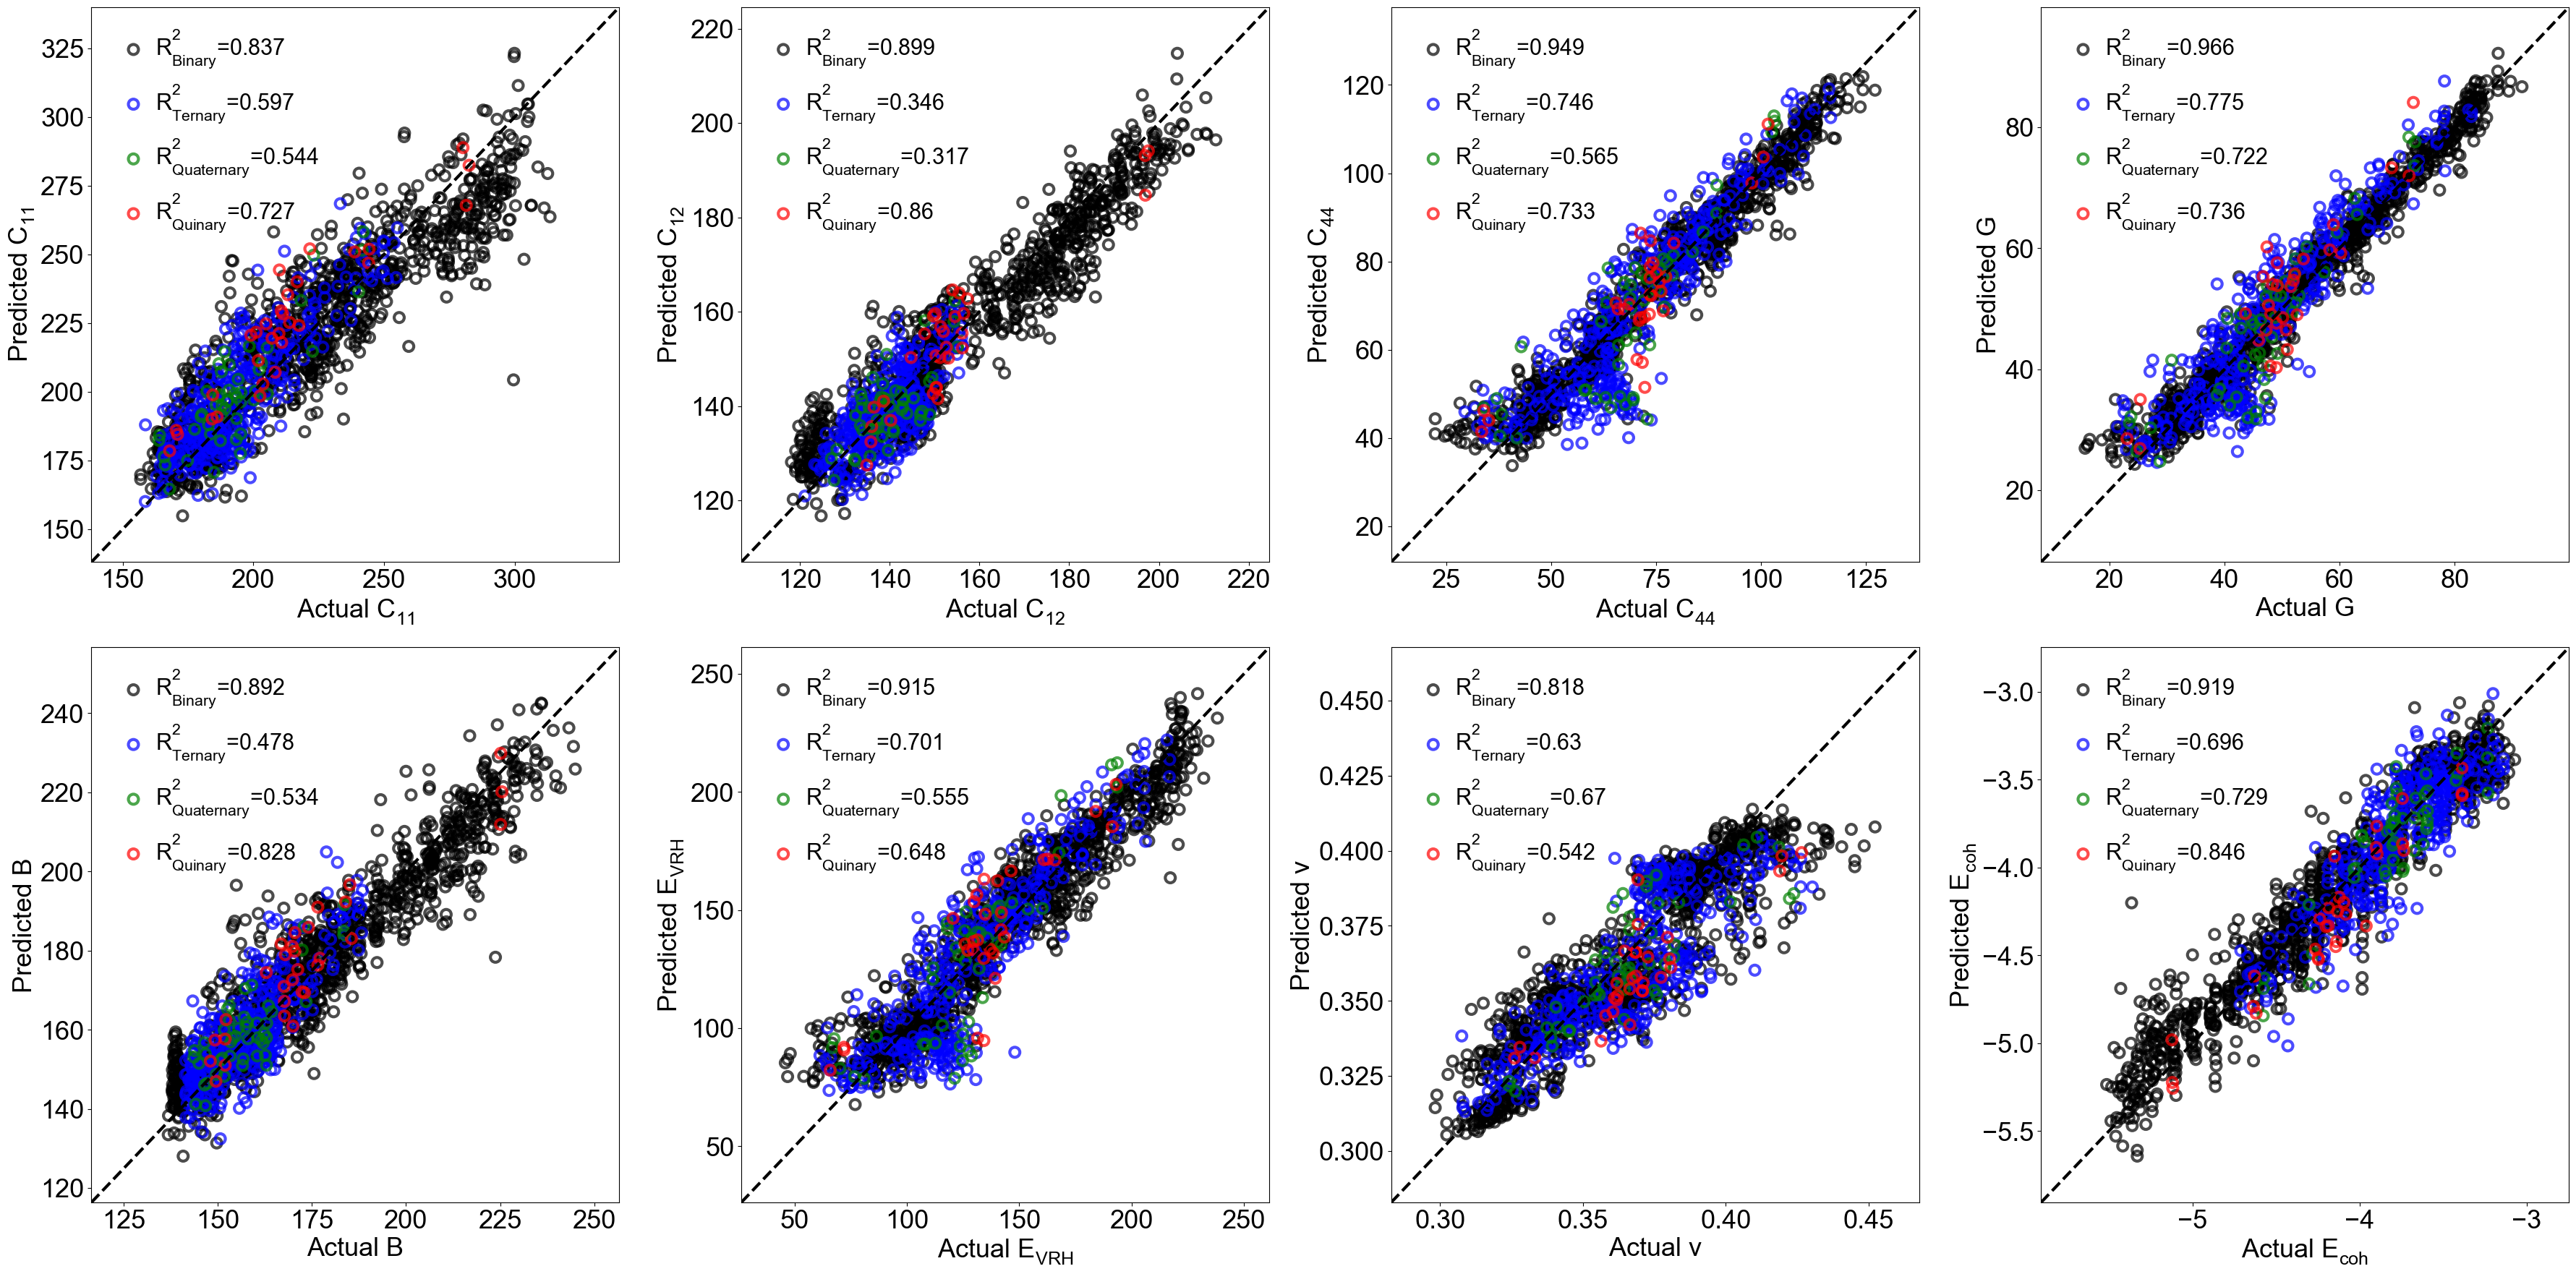

In [10]:
data = pd.read_csv('results/100%Binaries(No normalization)/augmented_results_100B.csv')
target_vs_preds(data, color_code_by='type', path_to_save='plots/per_type_100B_unnormalized.png')

We follow the same procedure to augment the results for the models trained on 100 binaries and 100 ternaries:

In [11]:
root = 'results/100%B100%T(without normalization)'
pred_columns = ['c11', 'c12', 'c44', 'G', 'B', 'E_VRH', 'nu', 'Cohesive_energy']
filenames = [f'{root}/results_100B100T_{col}.xlsx' for col in pred_columns]

data = pd.read_csv('data.csv')

B_100_T_100 = pd.read_excel('results/normalized/results_100B_100T.xlsx')
data['split'] = B_100_T_100['set_type']
data['split'] = data['split'].replace('training', 'train')

for i in range(len(pred_columns)):
    result = pd.read_excel(filenames[i], header=None, names=[pred_columns[i]])
    data[f'{pred_columns[i]}_pred'] = result

data.to_csv(f'{root}/augmented_results_100B_100T.csv', index=False)

Note that the augmented results are now saved in the directory: "results/100%B100%T(without normalization)." The following code is used to generate figure 7 in the manuscripts:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

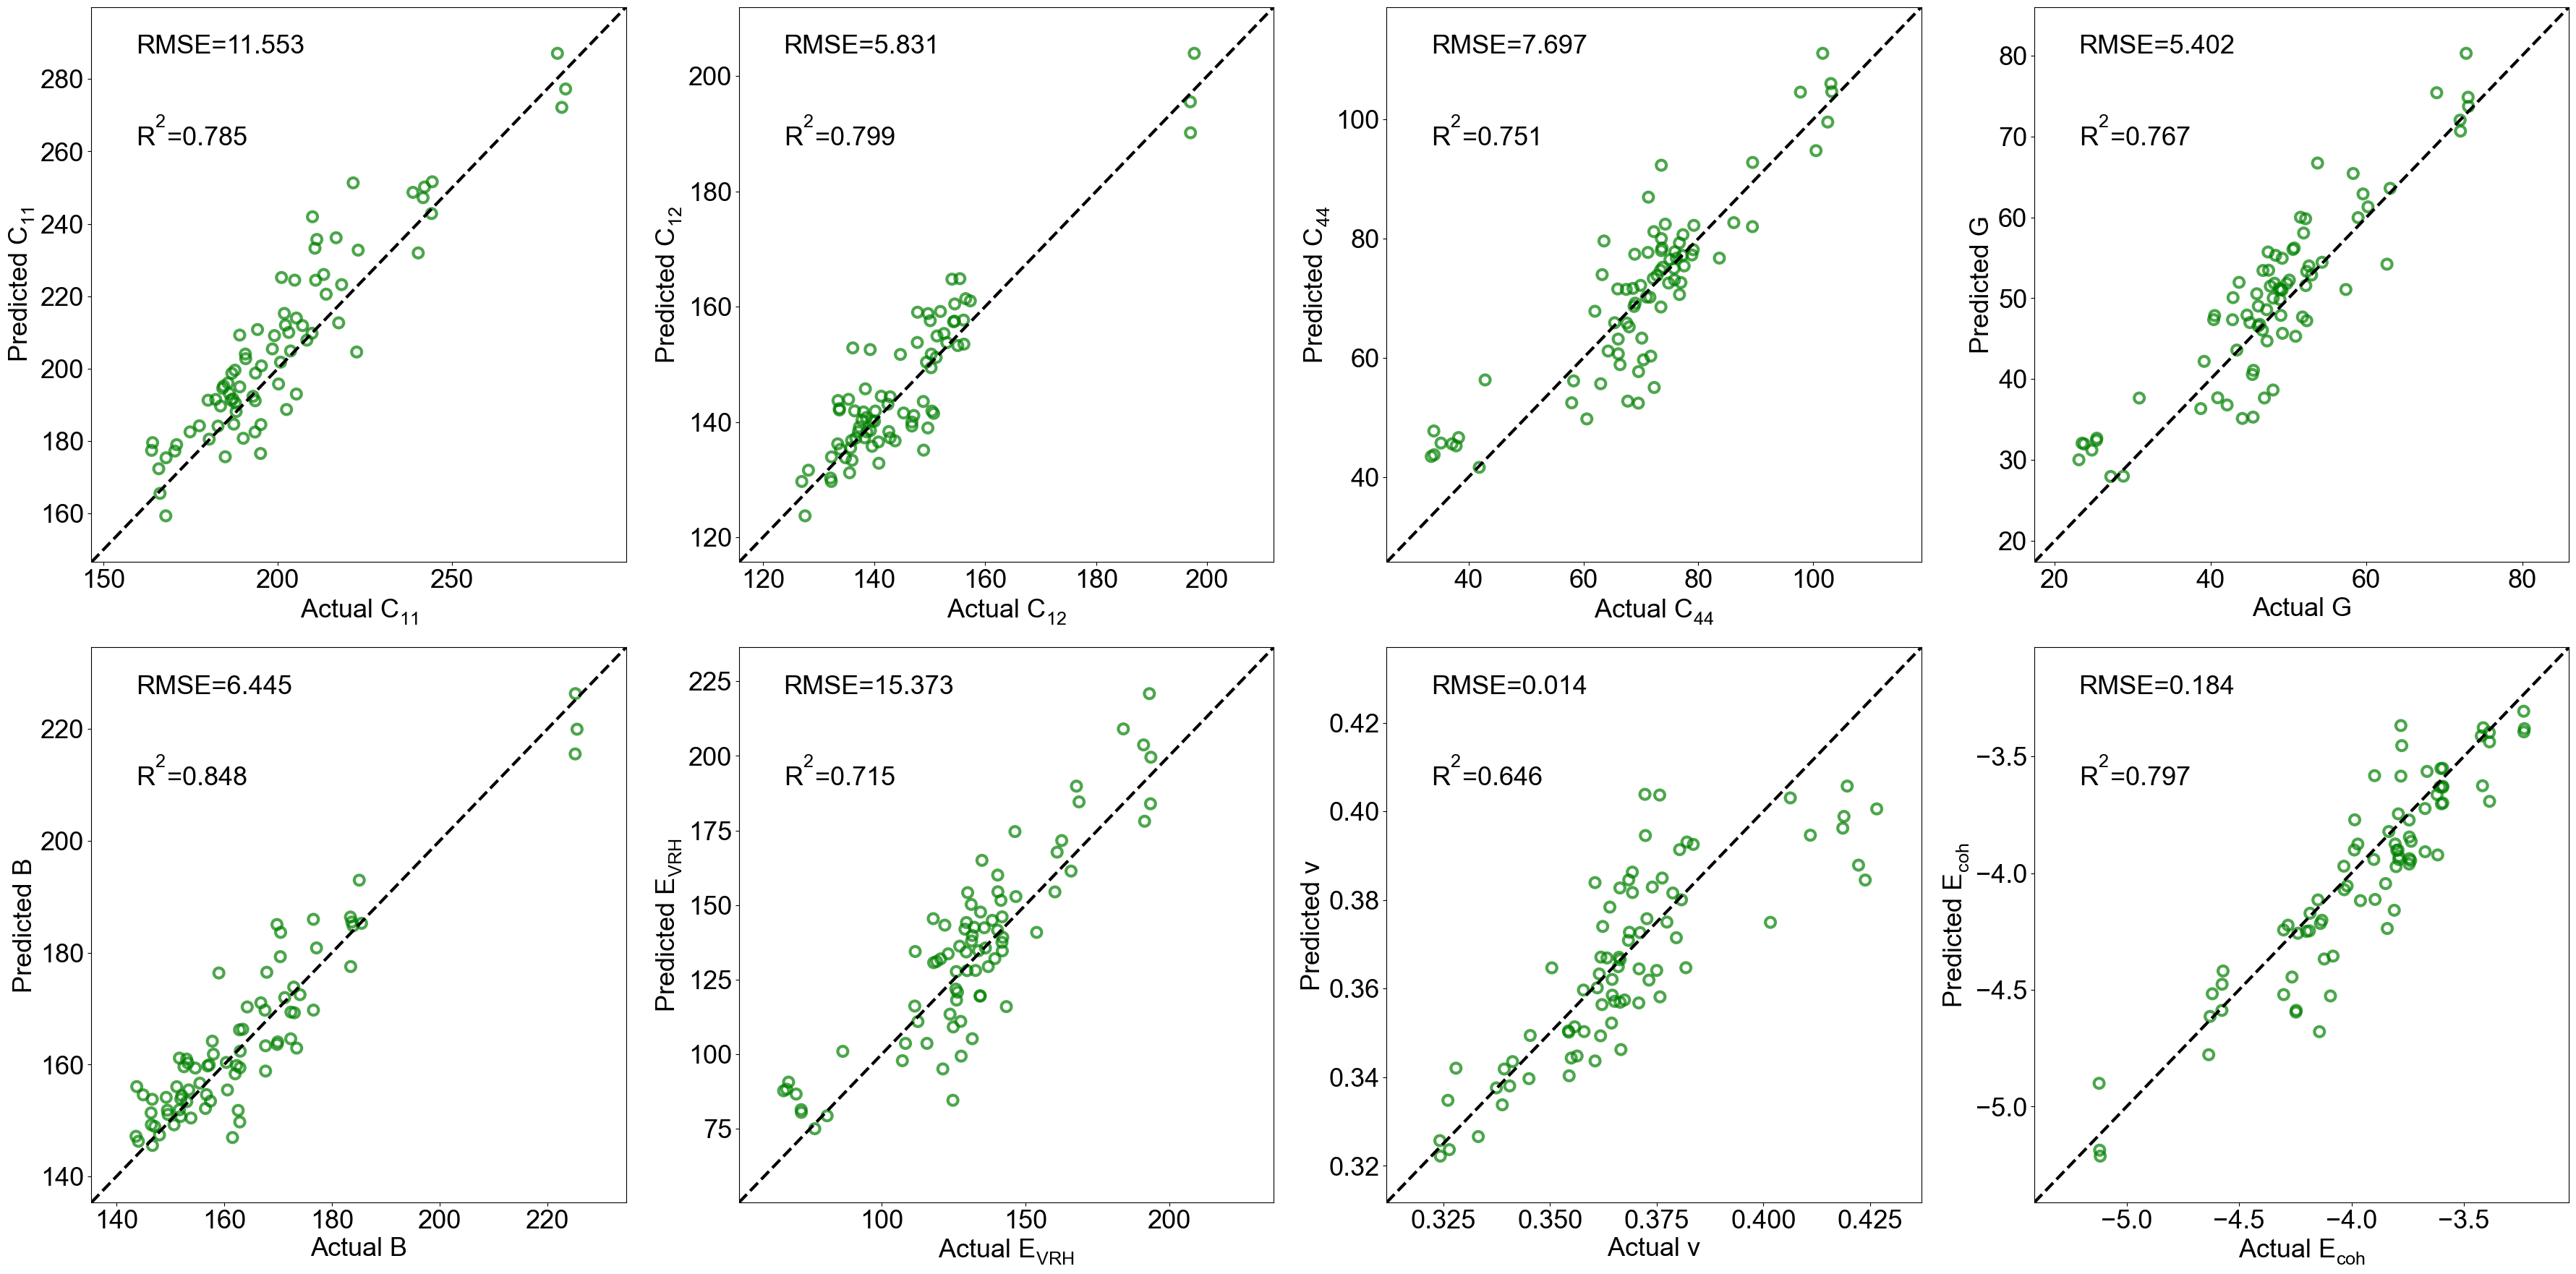

In [12]:
data = pd.read_csv('results/100%B100%T(without normalization)/augmented_results_100B_100T.csv')
data = data[data['type'].isin(['quaternary', 'quinary'])]
target_vs_preds(data, color_code_by=None, path_to_save='plots/qq_100B_100T_unnormalized.png')

And finally to reproduce figure 8, we run the following:

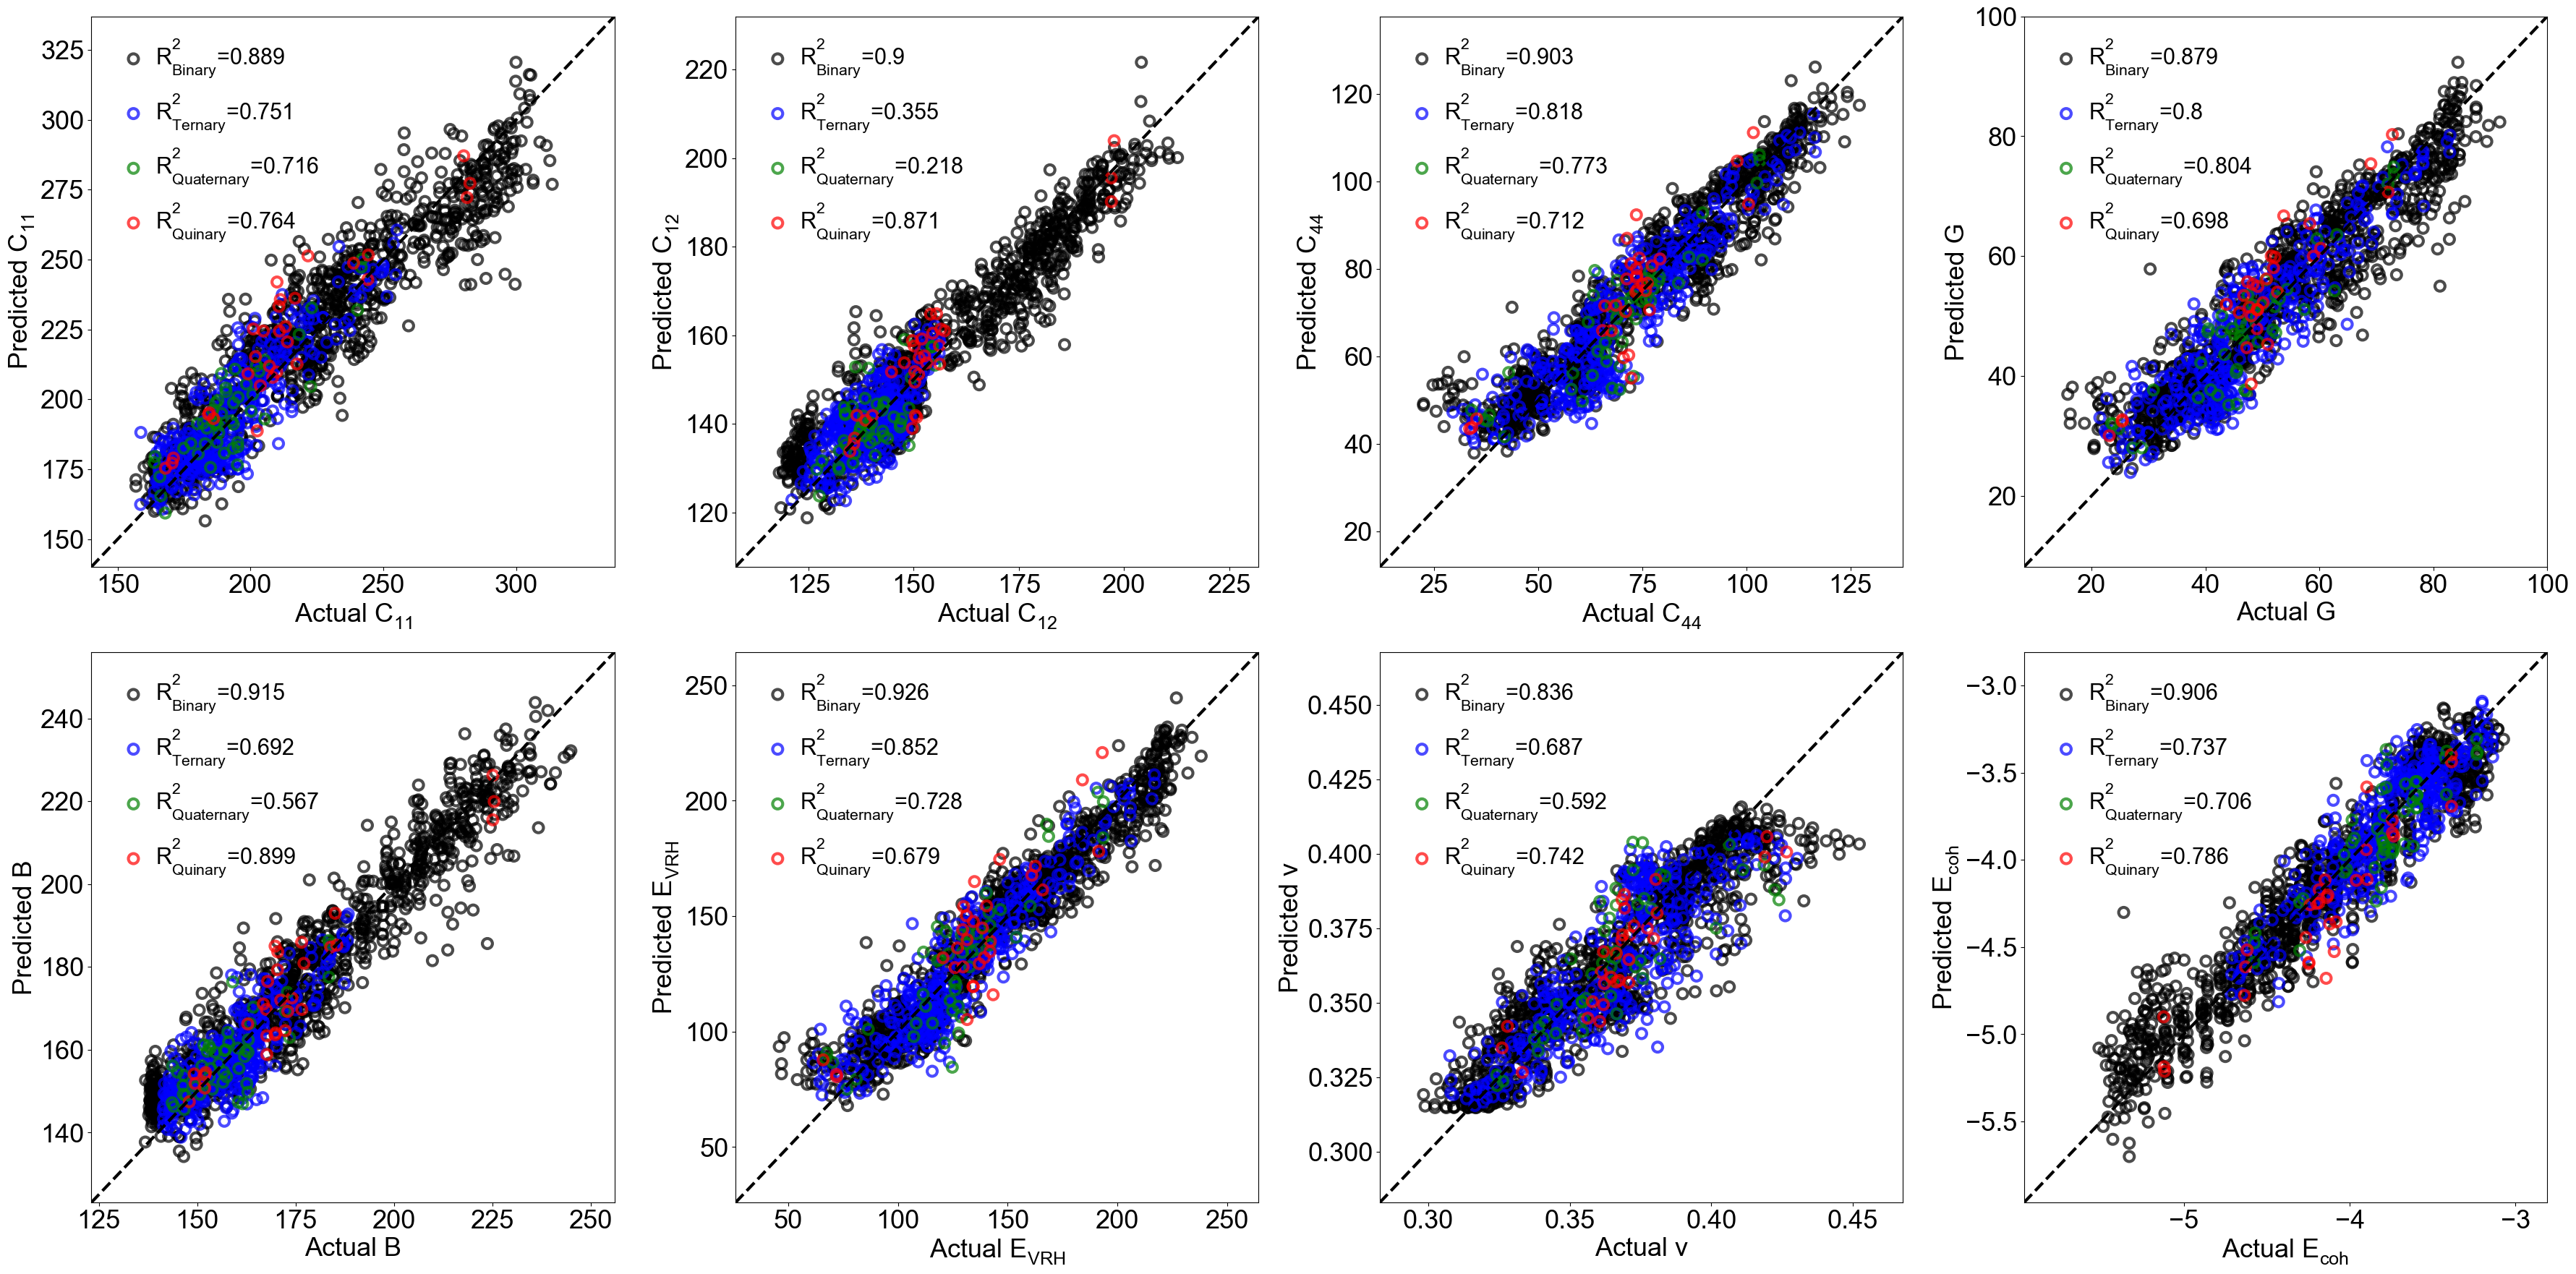

In [13]:
data = pd.read_csv('results/100%B100%T(without normalization)/augmented_results_100B_100T.csv')
target_vs_preds(data, color_code_by='type', path_to_save='plots/per_type_100B_100T_unnormalized.png')

# Figure 9

In [6]:
cnn_data = pd.read_csv('rom_data/augmented_results_100B.csv')
linton_data = pd.read_csv('rom_data/reviewers_2-NiAu.csv')
linton_data['c44_avg'] = (linton_data['c44']+linton_data['c55']+linton_data['c66'])/3
true_c44_bin = {'3D CNN': cnn_data.loc[(cnn_data['type']=='binary') & (cnn_data['directory']=='2_Ni_Au')]['c44'].values,
                'Linton & Aidhy\nGBR':linton_data['c44_avg'].values,
                'Rule of mixtures':pd.read_csv(r"rom_data/2-Ni-Au_ROM.csv")['C44_avg'].values,}



bin_c44 = {'3D CNN':cnn_data.loc[(cnn_data['type']=='binary') & (cnn_data['directory']=='2_Ni_Au')]['c44_pred'].values,
           'Linton & Aidhy\nGBR':pd.read_csv('rom_data/2-NiAu_preds.csv')['0'].values,
           'Rule of mixtures':pd.read_csv(r"rom_data/2-Ni-Au_ROM.csv")['C44_ROM'].values,}



In [8]:
cnn_data = pd.read_csv('rom_data/augmented_results_100B.csv')
linton_data = pd.read_csv('rom_data/reviewers_16-Ni-Cu-Au-Pd-Pt_ml.csv')
linton_data['c44_avg'] = (linton_data['c44']+linton_data['c55']+linton_data['c66'])/3
true_c44 = {'3D CNN': cnn_data.loc[(cnn_data['type']=='quinary')]['c44'].values,
            'Linton & Aidhy\nGBR':linton_data['c44_avg'].values,
            'Rule of mixtures':pd.read_csv(r"rom_data/1-Ni-Cu-Au-Pd-Pt_ROM.csv")['C44_avg'].values,}


quin_c44 = {'3D CNN':cnn_data.loc[(cnn_data['type']=='quinary')]['c44_pred'].values,
           'Linton & Aidhy\nGBR':pd.read_csv('rom_data/c44_avg-quinary_pred.csv',header=None)[0].values,
           'Rule of mixtures':pd.read_csv(r"rom_data/1-Ni-Cu-Au-Pd-Pt_ROM.csv")['C44_ROM'].values,}

In [9]:
markers = {'3D CNN':'s','Linton & Aidhy\nGBR':'^','Rule of mixtures':'x'}
colors = {'3D CNN':'red','Linton & Aidhy\nGBR':'green','Rule of mixtures':'blue'}

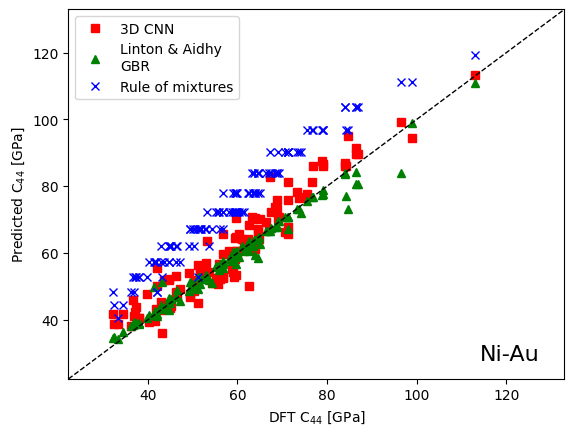

In [10]:
for key, val in bin_c44.items():
#     print(key)
    plt.plot(true_c44_bin[key],val,c=colors[key],marker=markers[key],ls='none',label=key)
    
#     r2 = r2s(true_c44_bin[key],val)
#     rmse = math.sqrt(mse(true_c44_bin[key],val))
#     if key == 'Rule of mixtures':
#         plt.plot(true_c44_bin[key],val,c=colors[key],marker=markers[key],ls='none',label=f'{key}\n$R^2$={round(r2,2)}')
#     else:
#         plt.plot(true_c44_bin[key],val,c=colors[key],marker=markers[key],ls='none',label=f'{key} $R^2$={round(r2,2)}')

line = [true_c44_bin['3D CNN'].min()-10,true_c44_bin['3D CNN'].max()+20]
plt.plot(line,line,'k--',lw=1)

plt.text(0.95*(line[1]-line[0])+line[0],0.05*(line[1]-line[0])+line[0],'Ni-Au',fontsize=16,ha='right')

plt.xlabel('DFT C$_{44}$ [GPa]')
plt.ylabel('Predicted C$_{44}$ [GPa]')

plt.xlim(line)
plt.ylim(line)

plt.legend(loc=2)

# plt.savefig(f'plots/comp_c44_bin.{file_type}',bbox_inches="tight",transparent=True)
plt.show()

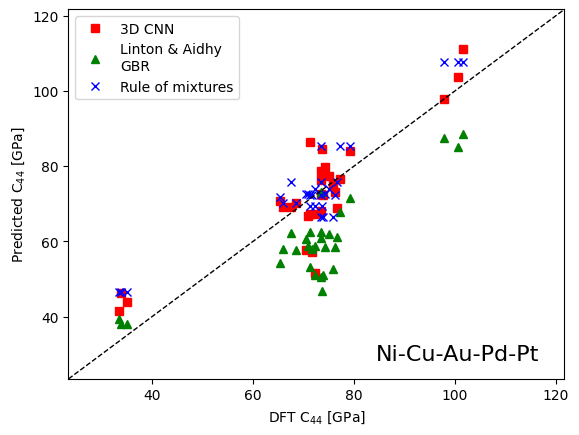

In [11]:
for key, val in quin_c44.items():
#     print(key)

    plt.plot(true_c44[key],val,c=colors[key],marker=markers[key],ls='none',label=key)

#     r2 = r2s(true_c44[key],val)
#     rmse = math.sqrt(mse(true_c44[key],val))
#     if key == 'Rule of mixtures':
#         plt.plot(true_c44[key],val,c=colors[key],marker=markers[key],ls='none',label=f'{key}\nRMSE={round(rmse,2)}')
#     else:
#         plt.plot(true_c44[key],val,c=colors[key],marker=markers[key],ls='none',label=f'{key} RMSE={round(rmse,2)}')

    
    
line = [true_c44['3D CNN'].min()-10,true_c44['3D CNN'].max()+20]
plt.plot(line,line,'k--',lw=1)

plt.xlabel('DFT C$_{44}$ [GPa]')
plt.ylabel('Predicted C$_{44}$ [GPa]')

plt.text(0.95*(line[1]-line[0])+line[0],0.05*(line[1]-line[0])+line[0],'Ni-Cu-Au-Pd-Pt',fontsize=16,ha='right')

plt.xlim(line)
plt.ylim(line)

plt.legend()

# plt.savefig(f'plots/comp_c44_quin.{file_type}',bbox_inches="tight",transparent=True)
plt.show()